In [16]:
import pandas as pd
import pathlib, os, math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from itertools import product
import warnings
warnings.filterwarnings('ignore')

In [17]:
base_repo_dir = pathlib.Path(os.getcwd()).parents[1]

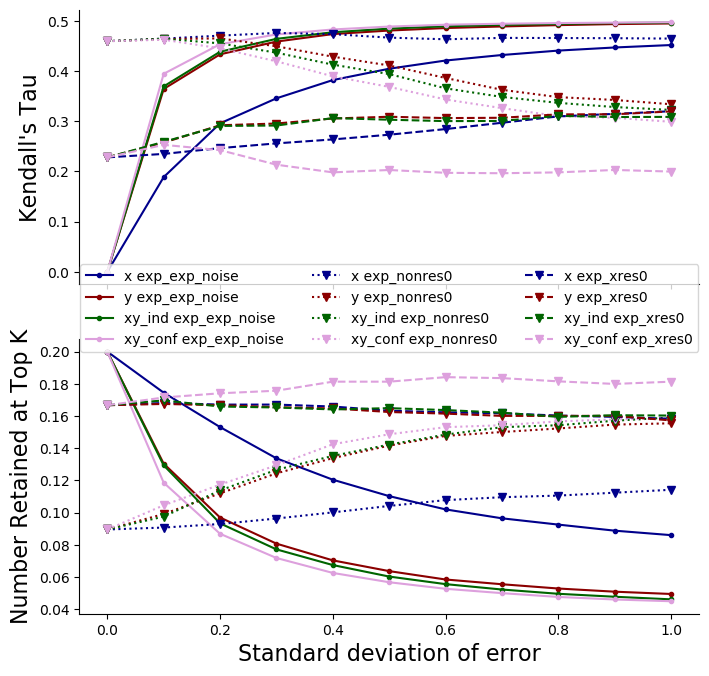

In [20]:
exp_kt = pd.read_pickle(base_repo_dir/'out'/'distance_metrics'/'err_sd'/'kendalls_tau'/'expected.pkl',
                         compression='gzip')

exp_ret = pd.read_pickle(base_repo_dir/'out'/'distance_metrics'/'err_sd'/'num_retained_at_top_k'/'expected.pkl',
                         compression='gzip')

exp_dfs = [exp_kt, exp_ret]

dag_errs = ['x', 'y', 'xy_ind', 'xy_conf']
dag_err_color_dict = {'x': 'darkblue', 'y': 'darkred', 'xy_ind':'darkgreen', 'xy_conf': 'plum'}

sd_values = sorted(list(set([float(x[1]) for x in exp_kt.index.values])))



col_linestyle_dict = {'exp_exp_noise':'solid', 
                      'exp_nonres0':'dotted', 'exp_nonres1':'dotted',
                      'exp_xres0':'dashed', 'exp_xres1':'dashed'}
col_marker_dict = {'exp_exp_noise':'.', 
                      'exp_nonres0':'v', 'exp_nonres1':'^',
                      'exp_xres0':'v', 'exp_xres1':'^'}

fig, ax = plt.subplots(2, 1, figsize=(8,8), dpi=100, sharex=True)

for i in range(2):
    # make spines invisible
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    for col in exp_kt.columns:
        if "1" in col:
            continue
        for dag_err in dag_errs:
            ax[i].plot(sd_values, exp_dfs[i].loc[dag_err][col], 
                         color=dag_err_color_dict[dag_err],
                         linestyle=col_linestyle_dict[col],
                         marker = col_marker_dict[col],
                         label=dag_err+' '+col)
            
    
    if i==0:
        ax[i].set_ylabel('Kendall\'s Tau', size=16)
    elif i==1:
        ax[i].set_ylabel('Number Retained at Top K', size=16)
        ax[i].set_xlabel('Standard deviation of error', size=16)

ax[1].legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, 1.3))
plt.show()